<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-29/blob/main/Actividad_Semanal_4_Equipo_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad semanal 4 

#Equipo 29


Nombre de Alumno: Angel De Jesus Hernandez Pascual
N. matrícula: A01794256

Nombre de Alumno: José Alberto Almada Gerardo
N. matrícula: A01794415


Profesor:	Jobish Vallikavungal Devassia 

Fecha: 10/09/2022

Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

Paso 3: Identifique valores atípicos
Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
EL minimo de componentes seria de 3, ya que son los que representan la mayor varianza

¿Cuál es la variación de los datos que representan esos componentes?
con estos se obtine una varianza superando el 93%

¿Cuál es la pérdida de información después de realizar PCA?
la tecnica de PCA realiza la una transformacion con la menor perdida de informacion util posible, crando solo una redimencionalidad de la variables en otras llamadas componentes

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
Las variables de mayor valor son: Amount of bill statement (X15,X14,X16)
Las de menor valor son: History of past payment (X9,X8,X7)

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
Se recomienda para el analisis exploratorio de datos y para construir modelos predictivos. Debido a que este analisis nos ayuda a demostrar que datos son los que aportan una mayor varianza, lo que significa que seran mas utiles para el modelo. Reduciendo el uso de computo, debido a que con los datos de mayor de variaza se pueden obtener buenos resultados, sin llegar a problemas de memorizacion o sobreentrenamiento.

In [ ]:
import pandas as pd
import numpy as np
input= 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
df = pd.read_csv(input, index_col=0)
df.index.name = None

In [ ]:
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.shape

(30000, 24)

In [ ]:
ndf = df.copy()
ndf.dropna(inplace = True)
ndf.isna().sum()
nndf = ndf.copy()
nndf = nndf.drop(columns=['Y'])

In [ ]:
nndf.shape

(29958, 23)

Nomalizacion Min_Max

In [ ]:
ndf.X17.mean().round(2)

38889.93

In [ ]:
ndf.X23.mean().round(2)

5220.71

In [ ]:
Varience = np.cov([df.X17, df.X23])
Varience

array([[nan, nan],
       [nan, nan]])

In [ ]:
#Varianza total 
ndf = ndf[["X17","X23"]]
ndf.var().sum()

3866567925.992055

In [ ]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [ ]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of X1 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X2 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 3866567925.99
Varience prop. of X1 	: nan %
Varience prop. of X2 	: nan %


In [ ]:
varX = ndf.X17.to_list()
varY = ndf.X23.to_list()

In [ ]:
ndf.corr().round(2)

,X17,X23
X17,1.00,0.12
X23,0.12,1.00


In [ ]:
def normalizacion(x):
  min = np.min(x)
  print(min)
  max = np.max(x)
  print(max)
  rango = max-min
  return [(a-min)/rango for a in x]

In [ ]:
nVarX = normalizacion(varX)

-339603.0
961664.0


In [ ]:
nVarY = normalizacion(varY)

0.0
528666.0


#PCA

In [ ]:
import seaborn as sns

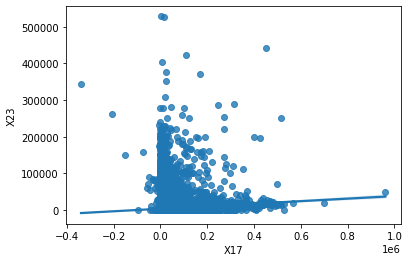

In [ ]:
p = sns.regplot(data = df,  
                x = ndf.X17, 
                y = ndf.X23
               ) 
p

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA(n_components=2)

pcs.fit(ndf[['X17', 'X23']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,59621.650237,0.919353,0.919353
1,17658.616847,0.080647,1.000000


In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,59621.65,17658.62
Proportion of variance,0.92,0.08
Cumulative proportion,0.92,1.00


In [ ]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,59621.6502,17658.6168
Proportion of variance,0.9194,0.0806
Cumulative proportion,0.9194,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 83.70% of the total variability and 
* `z2` for the remaining 16.30%. 

Therefore, if we drop `z2 = PC2`, we still maintain 86.32% of the total variability. 

### Scree Plot


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

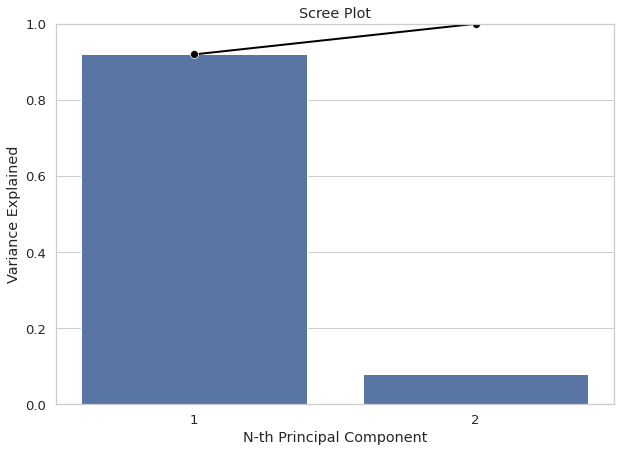

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [ ]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.9993,  0.0377],
       [-0.0377,  0.9993]])

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X17', 'X23']
                                )
pcsComponents_df

,PC1,PC2
X17,0.999287,-0.037749
X23,0.037749,0.999287


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

In [ ]:
Xs = pd.DataFrame(pcs.transform(ndf[['X17', 'X23']]),
                      columns=['x', 'y']
                      )
Xs.head()

,x,y
0,-39059.284854,-3748.917822
1,-35725.110482,-1873.443946
2,-23332.620858,660.553865
3,-9495.595444,-3865.010376
4,-19916.288870,-3792.584439


In [ ]:
Xs.x.mean()

1.3678547727846003e-12

In [ ]:
Xs.y.sum()

4.0745362639427185e-09

In [ ]:
Xs.x.var() + Xs.y.var()

3866567925.992056

In [ ]:
((Xs.x.var()/
  (Xs.x.var()+Xs.y.var())
 )*100).round(0)

92.0

In [ ]:
pcs = PCA()
pcs.fit(nndf)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Standard deviation,166585.075260,115824.701663,37256.816553,27747.103019,20698.682257,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,...,9.118055e+00,2.062793e+00,9.388332e-01,7.529159e-01,7.313989e-01,5.962443e-01,5.121485e-01,4.940197e-01,4.592518e-01,4.185387e-01
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,...,1.829231e-09,9.362147e-11,1.939283e-11,1.247261e-11,1.176990e-11,7.821908e-12,5.771066e-12,5.369734e-12,4.640513e-12,3.854212e-12
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Scree Plot

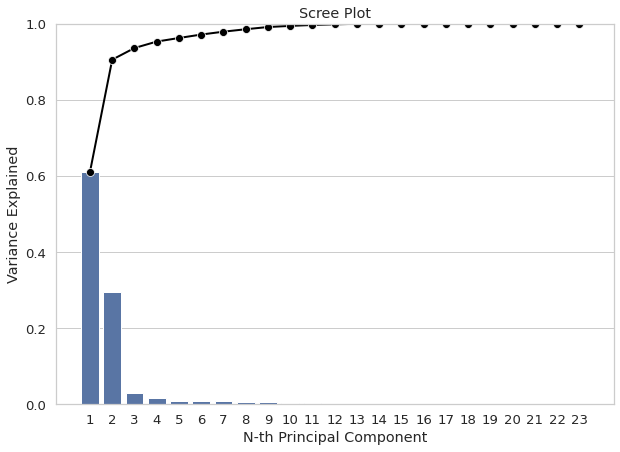

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

94.0

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][1])*100).round(2)

90.57

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,...,9.1181,2.0628,0.9388,0.7529,0.7314,0.5962,0.5121,0.494,0.4593,0.4185
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000


In [ ]:
pcs.components_

array([[ 4.91051249e-01, -3.60183560e-08, -3.66863368e-07,
        -1.91693911e-07,  5.56462827e-06,  3.44159275e-07,
         5.70426106e-07,  5.84697827e-07,  6.67552613e-07,
         7.61271023e-07,  8.37911287e-07,  3.88614777e-01,
         3.81500219e-01,  3.72316835e-01,  3.46509376e-01,
         3.23011793e-01,  3.08673561e-01,  2.65507164e-02,
         3.12770650e-02,  2.68070179e-02,  2.21621169e-02,
         2.21853695e-02,  2.48009681e-02],
       [ 8.69327754e-01,  1.73905429e-07, -1.49968009e-06,
        -4.00325888e-07,  8.29040076e-06, -3.80425812e-06,
        -4.62046631e-06, -4.49870552e-06, -4.25800662e-06,
        -4.02895450e-06, -3.98194484e-06, -2.21093578e-01,
        -2.26152724e-01, -2.16301840e-01, -1.93842429e-01,
        -1.76598449e-01, -1.67159508e-01,  5.71363887e-03,
         1.08089432e-02,  1.09872540e-02,  1.03870690e-02,
         1.16983563e-02,  1.53688818e-02],
       [-2.05568405e-02,  3.26050600e-07, -9.71580370e-07,
         7.38143869e-08, -4.1

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = nndf.columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X1,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02,-4.412772e-02
X2,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08,-3.668197e-07
X3,-3.668634e-07,-1.499680e-06,-9.715804e-07,2.080063e-07,4.527315e-07
X4,-1.916939e-07,-4.003259e-07,7.381439e-08,9.660929e-08,6.632308e-07
X5,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07,-4.919226e-06
X6,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06,-3.362837e-06
X7,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06,-2.039644e-06
X8,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06,-3.622823e-06
X9,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07,-4.424635e-06
X10,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07,-4.182947e-06


In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = nndf.columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
X1,4.910512e-01,8.693278e-01,-2.055684e-02,-1.841183e-02,-4.412772e-02,1.689850e-02,-1.113634e-03,1.027832e-03,9.471739e-03,3.750819e-03,...,-1.037909e-05,0.000008,-5.824365e-07,1.443837e-06,-3.483612e-07,-2.038085e-07,-3.347323e-08,3.762458e-07,2.638601e-07,4.891053e-08
X2,-3.601836e-08,1.739054e-07,3.260506e-07,-2.528175e-08,-3.668197e-07,2.023762e-07,1.698048e-07,1.768554e-07,-1.321406e-07,1.200907e-07,...,-5.101767e-03,-0.015304,1.199551e-02,5.692290e-02,-2.355976e-02,-9.524443e-03,-8.384565e-02,-8.271520e-01,5.514321e-01,-2.054142e-02
X3,-3.668634e-07,-1.499680e-06,-9.715804e-07,2.080063e-07,4.527315e-07,9.305090e-08,-6.318617e-07,-4.174017e-08,1.693236e-07,-2.996884e-07,...,1.809119e-02,0.016276,-2.820662e-02,9.756383e-01,-1.788843e-01,-1.599582e-02,-9.736845e-03,1.076489e-01,5.276090e-02,4.463954e-03
X4,-1.916939e-07,-4.003259e-07,7.381439e-08,9.660929e-08,6.632308e-07,-2.901973e-07,1.701102e-07,-4.021665e-07,-2.988025e-07,-2.743981e-08,...,-2.309951e-02,-0.002358,1.276279e-02,-1.005385e-01,1.876048e-02,1.698669e-02,6.156939e-03,5.461234e-01,8.307925e-01,-6.683640e-03
X5,5.564628e-06,8.290401e-06,-4.101474e-06,-2.412869e-07,-4.919226e-06,1.560179e-06,-1.473511e-06,-2.044437e-06,6.936249e-06,-2.084484e-07,...,9.995439e-01,0.004411,2.004442e-03,-1.969306e-02,3.796904e-03,3.248845e-04,-1.466722e-04,6.405165e-03,2.108164e-02,-8.320145e-04
X6,3.441593e-07,-3.804258e-06,-4.165337e-07,-2.626152e-06,-3.362837e-06,2.184932e-06,-1.801390e-06,7.901413e-07,-8.311204e-07,2.311084e-06,...,-6.500597e-04,0.327271,-6.275200e-01,-1.340782e-01,-6.174001e-01,2.801062e-01,-1.437953e-01,5.220351e-03,-5.176865e-05,-2.807440e-02
X7,5.704261e-07,-4.620466e-06,-5.837432e-07,-2.669882e-06,-2.039644e-06,2.113731e-06,-2.639450e-06,6.918592e-07,-2.074728e-06,1.219987e-06,...,-1.695506e-03,0.415760,-4.357438e-01,2.882034e-02,2.829812e-01,-5.807030e-01,4.520285e-01,-3.642074e-02,3.827117e-02,1.096470e-01
X8,5.846978e-07,-4.498706e-06,5.099712e-07,-1.788093e-06,-3.622823e-06,1.006594e-06,3.623000e-06,1.361339e-07,-1.919681e-06,3.779772e-07,...,-2.240967e-03,0.441994,-1.175360e-01,8.635494e-02,5.576935e-01,1.460985e-01,-6.210460e-01,3.338987e-02,-2.150978e-02,-2.524324e-01
X9,6.675526e-07,-4.258007e-06,2.096678e-06,2.221115e-07,-4.424635e-06,2.463802e-06,8.351550e-07,1.268560e-06,-2.735785e-06,2.397364e-06,...,-1.987660e-03,0.441968,2.325078e-01,4.102808e-02,1.495438e-01,5.749768e-01,3.244498e-01,-4.599669e-02,1.960960e-02,5.368308e-01
X10,7.612710e-07,-4.028954e-06,3.450833e-06,-8.788431e-07,-4.182947e-06,-9.041447e-07,-8.252028e-07,-6.738915e-07,-1.921178e-06,4.290639e-06,...,-2.739733e-03,0.417746,3.883926e-01,-2.213474e-02,-1.956363e-01,4.652916e-02,3.463922e-01,-1.679252e-02,-1.362254e-03,-7.165417e-01


In [ ]:
from sklearn import preprocessing

In [ ]:
nndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(nndf.dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.

PCA()

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5581,2.0243,1.2454,1.2131,1.0128,0.9783,0.9528,0.9422,0.9335,0.8849,...,0.7243,0.6354,0.5097,0.4992,0.4345,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,...,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4627,0.5301,0.5941,0.6387,0.6803,0.7198,0.7584,0.7962,0.8303,...,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


In [ ]:
pcsSummary_df.iloc[0,6]

0.9528294465840192

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=nndf.columns
                                )
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.068513,0.316364,0.017300,0.069526,-0.150030,-0.375095,0.106564
X2,-0.021586,0.030205,0.024284,-0.078109,0.883357,-0.396295,0.065237
X3,0.019167,-0.091513,-0.316638,0.246490,0.365704,0.563608,-0.400609
X4,-0.005612,-0.043043,0.453725,-0.443931,-0.053225,0.280022,-0.160569
X5,0.014262,0.066656,-0.463023,0.462041,-0.164345,-0.088112,0.081440
X6,0.161183,-0.298260,-0.017384,0.016395,-0.035463,-0.039066,-0.086692
X7,0.194171,-0.334879,0.017808,0.050119,-0.037997,-0.060660,-0.091881
X8,0.200348,-0.343802,0.061514,0.084101,-0.023945,-0.069601,-0.020974
X9,0.207166,-0.344508,0.088704,0.109227,-0.007883,-0.087272,0.039403
X10,0.211029,-0.331488,0.108582,0.115438,0.001892,-0.087219,0.104041


In [ ]:
pcsComponents_df.PC1.idxmax()

'X15'

In [ ]:
pcsComponents_df.PC1.nlargest(24)

X15    0.353848
X16    0.351716
X14    0.349744
X13    0.345767
X17    0.344477
X12    0.334369
X10    0.211029
X9     0.207166
X11    0.206424
X8     0.200348
X7     0.194171
X6     0.161183
X18    0.094157
X20    0.086332
X19    0.078630
X21    0.077751
X22    0.075281
X23    0.069898
X1     0.068513
X3     0.019167
X5     0.014262
X4    -0.005612
X2    -0.021586
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC2.idxmin()

'X9'

In [ ]:
pcsComponents_df.PC2.nsmallest(10)

X9    -0.344508
X8    -0.343802
X7    -0.334879
X10   -0.331488
X11   -0.305686
X6    -0.298260
X3    -0.091513
X4    -0.043043
X2     0.030205
X5     0.066656
Name: PC2, dtype: float64